In [1]:
import os
import anndata as ad
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import sys
sys.path.append('/home/yuanyuan.fu/bin/scripts') 
import plot_spatial_histograms as histplot
from scalebar_util import add_scalebar
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

root_directory = '/allen/programs/celltypes/workgroups/rnaseqanalysis/HMBA/Aim1_Atlases/BasalGanglia_paper_package/data/human/ATAC/Astro_subGroup/spatial/fig5'
data_dir = f"/allen/programs/celltypes/workgroups/rnaseqanalysis/hct_ux3_cellxgene/anndata_080/BasalGanglia/xspecies/"
os.chdir(root_directory)


/home/yuanyuan.fu/bin/miniconda3/envs/iterative_scANVI_May9/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/yuanyuan.fu/bin/miniconda3/envs/iterative_scANVI_May9/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/yuanyuan.fu/bin/miniconda3/envs/iterative_scANVI_May9/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/home/yuanyuan.fu/bin/miniconda3/envs/iterative_scANVI_May9/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/

In [2]:
data = sc.read_h5ad(data_dir + "HMBA_Human_Macaque_Marmoset_Mouse_snRNA-seq_BG_alignment_non-neurons.h5ad")

In [3]:
data

AnnData object with n_obs × n_vars = 957339 × 3000
    obs: 'Neighborhood', 'Class', 'Subclass', 'Group', 'Cluster', 'cluster_id', 'cell_type_ontology_term', 'load_id', 'donor_id', 'assay', 'assay_ontology_term_id', 'organism', 'organism_ontology_term_id', 'development_stage', 'anatomical_region', 'anatomical_region_merged', 'anatomical_region_ontology_term_id', 'brain_region_ontology_term_id', 'self_reported_sex', 'self_reported_sex_ontology_term_id', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'disease', 'disease_ontology_term_id', 'suspension_type', 'is_primary_data', 'total_counts', 'total_genes', 'doublet_score', 'organism_sci', 'accession_group', 'embedding_set', 'CL:ID_group', 'tokens_group', 'display_order_group', 'literature_support', 'literature_name_short', 'literature_name_long', 'curated_markers', 'color_hex_group', 'color_group', 'accession_subclass', 'CL:ID_subclass', 'tokens_subclass', 'display_order_subclass', 'color_hex_subclass', 'color_sub

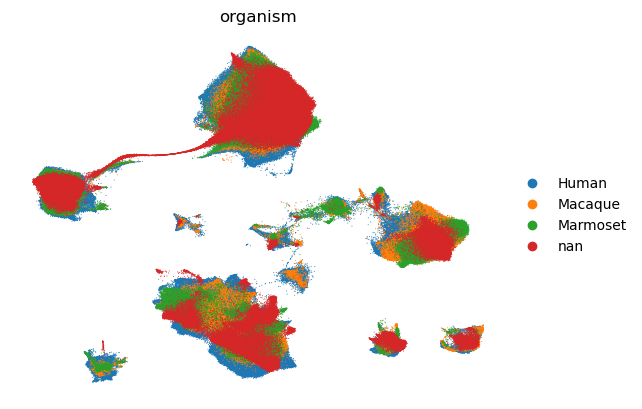

In [4]:
sc.pl.embedding(
    data,
    basis="X_umap",
    color=['organism'],#, 
    frameon=False,
    ncols=1,
    size=2,
   # save="siletti_clusterIDs.pdf" 
)

In [3]:
data_astro = data[data.obs['Group'] == "Astrocyte"].copy()

In [8]:
data_astro_hm = data_astro[data_astro.obs['organism'].isin(["Human", "Marmoset"])].copy()

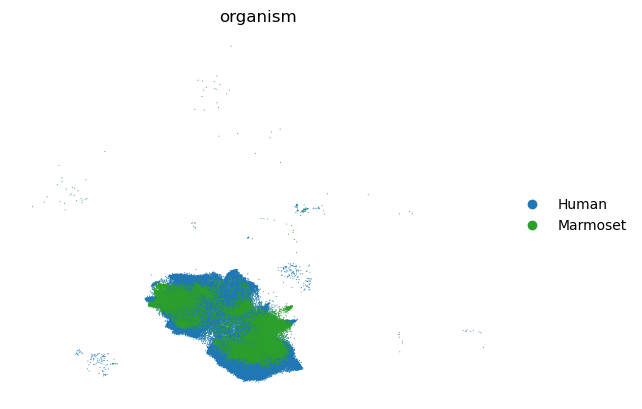

In [10]:
sc.pl.embedding(
    data_astro_hm,
    basis="X_umap",
    color=['organism'],#, 
    frameon=False,
    ncols=1,
    size=2,
   # save="siletti_clusterIDs.pdf" 
)

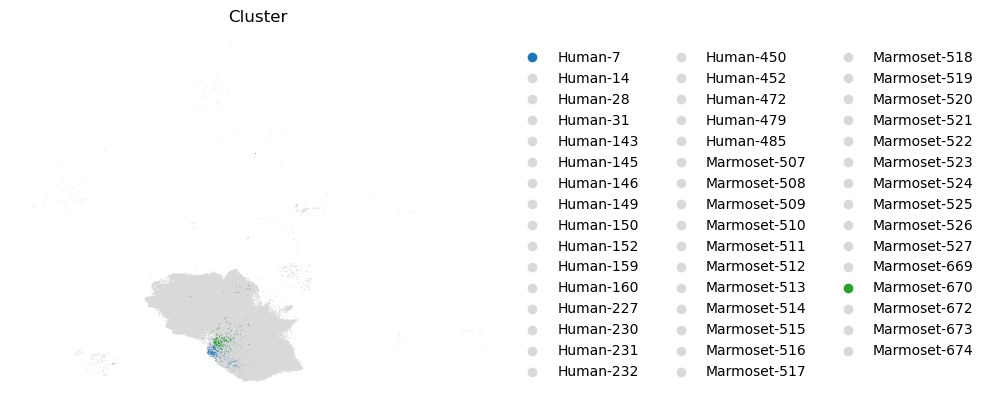

In [11]:
sc.pl.embedding(
    data_astro_hm,
    basis="X_umap",
    color=['Cluster'],#, 
    frameon=False,
    ncols=1,
    size=2,
   # save="siletti_clusterIDs.pdf" 
)

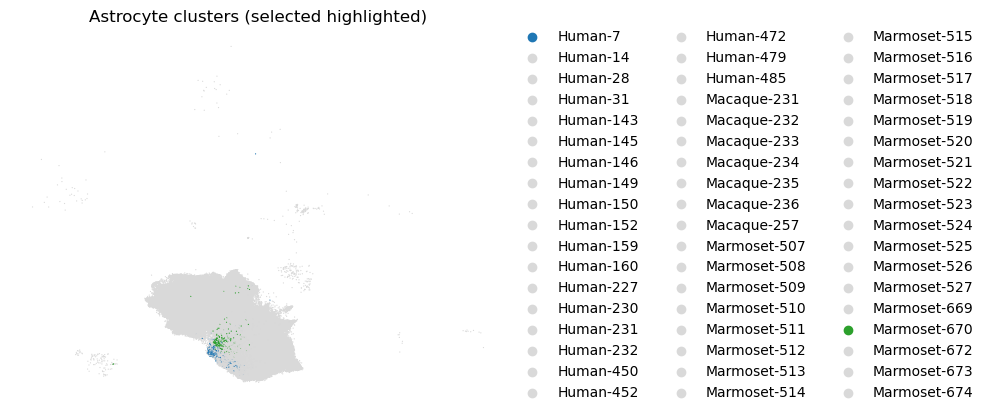

In [12]:
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

adata = data_astro
field = "Cluster"

# -------------------------
# 1. Define cluster palette
# -------------------------
if pd.api.types.is_categorical_dtype(adata.obs[field]):
    cats = list(adata.obs[field].cat.categories)
else:
    cats = sorted(adata.obs[field].unique())

base_color = "#d9d9d9"  # light gray for others
palette_dict = {c: base_color for c in cats}

# Clusters of interest
highlight_colors = {
    "Human-7":       "#1f77b4",  # blue
    "Marmoset-670":  "#2ca02c",  # green
   # "Human-14":      "#d62728",  # red
   # "Human-31":      "#9467bd",  # purple
   # "Macque-257":    "#ff7f0e",  # orange
   # "Marmoset-669":  "#8c564b",  # brown
   # "Marmoset-672":  "#e377c2",  # magenta
}
palette_dict.update({k: v for k, v in highlight_colors.items() if k in palette_dict})
palette_list = [palette_dict[c] for c in cats]

# -------------------------
# 2. Plot with Scanpy
# -------------------------
sc.pl.umap(
    adata,
    color=field,
    palette=palette_list,
    size=3,
    frameon=False,
    na_color="#f0f0f0",
    title="Astrocyte clusters (selected highlighted)",
    show=False
)
plt.show()

# -------------------------
# 3. (Optional) Manual plot if not using scanpy
# -------------------------
# emb = adata.obsm["X_umap"]  # or other embedding key
# fig, ax = plt.subplots(figsize=(5, 5))
# for c in cats:
#     mask = (adata.obs[field] == c).values
#     ax.scatter(
#         emb[mask, 0], emb[mask, 1],
#         s=5,
#         lw=0,
#         c=palette_dict[c],
#         alpha=1.0 if c in highlight_colors else 0.4,
#         label=c if c in highlight_colors else None
#     )
# handles, labels = ax.get_legend_handles_labels()
# if handles:
#     ax.legend(frameon=False, fontsize=8, loc="best")
# ax.set_xlabel("UMAP1")
# ax.set_ylabel("UMAP2")
# plt.tight_layout()
# plt.show()


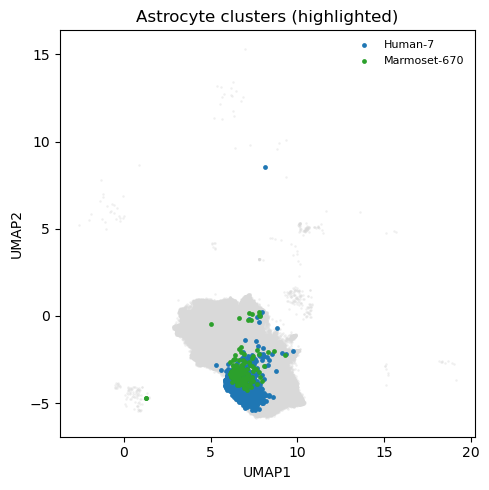

In [14]:
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

adata = data_astro_hm
field = "Cluster"

# -------------------------
# 1. Define cluster palette
# -------------------------
if pd.api.types.is_categorical_dtype(adata.obs[field]):
    cats = list(adata.obs[field].cat.categories)
else:
    cats = sorted(adata.obs[field].unique())

base_color = "#d9d9d9"  # light gray for others
palette_dict = {c: base_color for c in cats}

# Clusters of interest
highlight_colors = {
    "Human-7":       "#1f77b4",  # blue
    "Marmoset-670":  "#2ca02c",  # green
}
palette_dict.update({k: v for k, v in highlight_colors.items() if k in palette_dict})

emb = adata.obsm["X_umap"]  # or your embedding key
fig, ax = plt.subplots(figsize=(5, 5))

# -------------------------
# 2. Plot non-highlight clusters first
# -------------------------
for c in cats:
    if c not in highlight_colors:
        mask = (adata.obs[field] == c).values
        ax.scatter(
            emb[mask, 0], emb[mask, 1],
            s=3,
            lw=0,
            c=palette_dict[c],
            alpha=0.4
        )

# -------------------------
# 3. Plot highlighted clusters on top
# -------------------------
for c, color in highlight_colors.items():
    if c in cats:
        mask = (adata.obs[field] == c).values
        ax.scatter(
            emb[mask, 0], emb[mask, 1],
            s=12,
            lw=0,
            c=color,
            alpha=1.0,
            label=c,
            zorder=10  # ensure drawn on top
        )

# -------------------------
# 4. Final formatting
# -------------------------
ax.legend(frameon=False, fontsize=8, loc="best")
ax.set_xlabel("UMAP1")
ax.set_ylabel("UMAP2")
ax.set_title("Astrocyte clusters (highlighted)")
plt.tight_layout()

plt.savefig("Human_marmoset_astrocyte_clusters_highlighted.pdf", format="pdf", bbox_inches="tight", dpi=300)

plt.show()


In [17]:
adata

AnnData object with n_obs × n_vars = 162876 × 3000
    obs: 'Neighborhood', 'Class', 'Subclass', 'Group', 'Cluster', 'cluster_id', 'cell_type_ontology_term', 'load_id', 'donor_id', 'assay', 'assay_ontology_term_id', 'organism', 'organism_ontology_term_id', 'development_stage', 'anatomical_region', 'anatomical_region_merged', 'anatomical_region_ontology_term_id', 'brain_region_ontology_term_id', 'self_reported_sex', 'self_reported_sex_ontology_term_id', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'disease', 'disease_ontology_term_id', 'suspension_type', 'is_primary_data', 'total_counts', 'total_genes', 'doublet_score', 'organism_sci', 'accession_group', 'embedding_set', 'CL:ID_group', 'tokens_group', 'display_order_group', 'literature_support', 'literature_name_short', 'literature_name_long', 'curated_markers', 'color_hex_group', 'color_group', 'accession_subclass', 'CL:ID_subclass', 'tokens_subclass', 'display_order_subclass', 'color_hex_subclass', 'color_sub

In [21]:
adata.obs['anatomical_region'].value_counts()

anatomical_region
Brain     26192
GPe       20156
GPi       18058
CaB       15564
PuR       14045
PuC       10805
CaH       10230
NAC        9583
CaT        5792
PuPV       5007
SN         4404
STH        4322
VeP        4081
SN-VTA     3249
Eca        2733
NACc       2718
GPeR       2678
NACs       1436
Pu         1090
GPeC        733
Name: count, dtype: int64

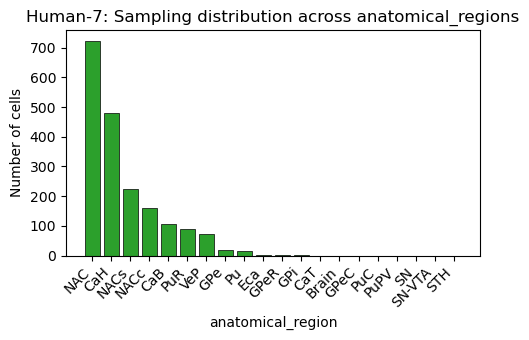

In [24]:

# -------------------------
# 1. Subset to the cluster of interest
# -------------------------
target_cluster = "Human-7"
df = adata.obs.copy()

region_key = "anatomical_region" if "anatomical_region" in df.columns else "anatomical_region_merged"


df_sub = df[df["Cluster"] == target_cluster].copy()

# -------------------------
# 2. Count cells per region
# -------------------------
counts = (
    df_sub.groupby(region_key)
    .size()
    .reset_index(name="n_cells")
    .sort_values("n_cells", ascending=False)
)

# -------------------------
# 3. Compute proportions (optional)
# -------------------------
total = counts["n_cells"].sum()
counts["proportion"] = counts["n_cells"] / total

# -------------------------
# 4. Plot
# -------------------------
fig, ax = plt.subplots(figsize=(5, 3.5))
ax.bar(
    counts[region_key],
    counts["n_cells"],
    color="#2ca02c",  # same green as in your UMAP
    edgecolor="black",
    linewidth=0.5
)
ax.set_xlabel(region_key)
ax.set_ylabel("Number of cells")
ax.set_title(f"{target_cluster}: Sampling distribution across {region_key.lower()}s")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Save as PDF (optional)
plt.savefig("Marmoset_670_sampling_barplot.pdf", format="pdf", bbox_inches="tight", dpi=300)
plt.show()
